In [1]:
# for pep8. ref: https://stackoverflow.com/questions/26126853/verifying-pep8-in-ipython-notebook-code
# %%pycodestyle added to some cells to check
# %load_ext pycodestyle_magic

## Project Details:
This project is part of Udacity's Data Scientist Nanodegree program. In this project, I am asked to pick a dataset and answer any 3 questions from the data. The project will follow [CRISP-DM process](https://www.sv-europe.com/crisp-dm-methodology/) (Cross Industry Process for Data Mining). CRISP-DM stands for:  
* Business understanding
* Data understanding
* Data preparation
* Modeling
* Evaluation
* Deployment

### Business understanding
My objective here is to predict football matches score. Main users of thie kind of applications are football fans and sports analysts. The plan is to make a model that can predict the outcome of a match based on previous matches.
Tha plan is to collect as much data as I can, what I managed to gather is full data of the past 9 seasons of the Saudi Professional League, which what I am going to analyze.

### Data understanding
My data source is [slstat.com](https://www.slstat.com), a website that keep track of scores and other details related to the Saudi Professional League. Here is a breakthrough of how my data looks like:
* Data is stored in excel files, with total of 9 files.
* Each file is for one season and it contains the following sheets:  
    1. Season Table. Example:
    
|  Team | Played | Won | Drawn | Lost | GF | GA | Goal-diff | Points | Rank |
|---|---|---|---|---|---|---|---|---|---|
|Al-Ittihad	|22	|17	|4	|1	|57	|21	|36	|55	|1|
|Al-Hilal	|22	|15	|5	|2	|41	|9	|32	|50	|2|
|Al-Ahli	|22	|11	|7	|4	|33	|20	|13	|40	|3|
|  . | .  |  . | . |  . | .  |  . | .  |  . | . |  . | 
|  . | .  |  . | . | . | .   |  . | .  |  . | . |  . | 
|  . | .  |  . | . | . | . |  . | .  |  . | . |  . | 
|  . | .  |  . | . | . | . |  . | .  |  . | . |  . | 
|  . | .  |  . | . | . | . |  . | .  |  . | . |  . | 
    
    2. Season Table by rounds.
    
| * | 1          | 2          | 3          | . | . | . | . | 20         | 21         | 22         |
|---|------------|------------|------------|---|---|---|---|------------|------------|------------|
| 1 | Al-Ittihad | Al-Ittihad | Al-Ittihad | . | . | . | . | Al-Hilal   | Al-Ittihad | Al-Ittihad |
| 2 | Al-Ettifaq | Al-Hilal   | Al-Nassr   | . | . | . | . | Al-Ittihad | Al-Hilal   | Al-Hilal   |
| 3 | Al-Hilal   | Al-Nassr   | Al-Hilal   | . | . | . | . | Al-Ahli    | Al-Ahli    | Al-Ahli    |
| 4 | Al-Nassr   | Al-Ettifaq | Al-Shabab  | . | . | . | . | Al-Shabab  | Al-Shabab  | Al-Shabab  |
| . | .          | .          | .          | . | . | . | . | .          | .          | .          |
| . | .          | .          | .          | . | . | . | . | .          | .          | .          |
| . | .          | .          | .          | . | . | . | . | .          | .          | .          |
| . | .          | .          | .          | . | . | . | . | .          | .          | .          |
| . | .          | .          | .          | . | . | . | . | .          | .          | .          |

    3. Top Scorers.
    
| Rank | Player               | Team       | Goals | Assist | Penalty | RF | LF | Head | 1st Half | 2nd Half | Matches Total | Minutes Played | Minutes per Goal |
|------|----------------------|------------|-------|--------|---------|----|----|------|----------|----------|---------------|----------------|------------------|
| 1    | Hicham Aboucherouane | Al-Ittihad | 12    | 5      | 1       | 3  | 9  | 0    | 5        | 7        | 16            | 1246           | 103.83           |
| 2    | Nassir Al-Shamrani   | Al-Shabab  | 12    | 3      | 3       | 11 | 1  | 0    | 3        | 9        | 20            | 1539           | 128.25           |
| 3    | EMAD Meteab          | Al-Ittihad | 10    | 0      | 1       | 8  | 2  | 0    | 6        | 4        | 15            | 1041           | 104.1            |
| 4    | Yasser Al-Qahtani    | Al-Hilal   | 10    | 2      | 0       | 5  | 1  | 4    | 3        | 7        | 16            | 1234           | 123.4            |
| .    | .                    | .          | .     | .      | .       | .  | .  | .    | .        | .        | .             | .              | .                |
| .    | .                    | .          | .     | .      | .       | .  | .  | .    | .        | .        | .             | .              | .                |
| .    | .                    | .          | .     | .      | .       | .  | .  | .    | .        | .        | .             | .              | .                |
| .    | .                    | .          | .     | .      | .       | .  | .  | .    | .        | .        | .             | .              | .                |
| .    | .                    | .          | .     | .      | .       | .  | .  | .    | .        | .        | .             | .              | .                |
| .    | .                    | .          | .     | .      | .       | .  | .  | .    | .        | .        | .             | .              | .                |


    4. Clubs.
    
| Club id | Name       | City     |
|---------|------------|----------|
| 1       | Al-Hilal   | Riyadh   |
| 2       | Al-Ittihad | Jeddah   |
| 3       | Al-Nassr   | Riyadh   |
| 4       | Al-Shabab  | Riyadh   |
| 5       | Al-Ahli    | Jeddah   |
| 6       | Al-Wehda   | Makkah   |
| 7       | Al-Ettifaq | Dammam   |
| 8       | Al-Raed    | Buraidah |
| 9       | Al-Hazem   | Al-Ras   |
| 12      | Najran     | Najran   |
| 17      | Al-Watani  | Tabuk    |
| 18      | Abha       | Abha     |


    5. Players.
    
| ID | Position   | Team ID    | Name             | Nationality | Birth date | Shirt No. | Height | Weight |
|----|------------|------------|------------------|-------------|------------|-----------|--------|--------|
| 1  |    NaN     | Al-Ittihad | Gabriel Calderon | Argentinian | 2/7/1960   | NaN       | NaN    | NaN    |
| 2  | Goalkeeper | Al-Ittihad | Mabrouk Zaid     | Saudi       | 2/11/1979  | 1         | 185 cm | 63 kg  |
| 3  | Goalkeeper | Al-Ittihad | Mustafa Malaika  | Saudi       | 5/20/1986  | 25        | 184 cm | 77 kg  |
| 4  | Goalkeeper | Al-Ittihad | Taiser Al-Netaif | Saudi       | 2/16/1974  | 22        | 187 cm | 62 kg  |
| .  | .          | .          | .                | .           | .          | .         | .      | .      |
| .  | .          | .          | .                | .           | .          | .         | .      | .      |
| .  | .          | .          | .                | .           | .          | .         | .      | .      |
| .  | .          | .          | .                | .           | .          | .         | .      | .      |
| .  | .          | .          | .                | .           | .          | .         | .      | .      |
| .  | .          | .          | .                | .           | .          | .         | .      | .      |
    
    6. Player Transfers.
    
| player ID | Transfer Type | From       | To         | Date       |
|-----------|---------------|------------|------------|------------|
| 3         | Transfer      | Al-Ittihad | Hajer      | 12/26/2011 |
| 4         | Transfer      | Al-Ittihad | Al-Faisaly | 8/24/2011  |
| 10        | Loan          | Al-Ettifaq | Al-Ittihad | 1/25/2011  |
| 10        | Transfer      | Al-Ittihad | Al-Ettifaq | 6/20/2010  |
| 11        | Transfer      | Al-Ittihad | Al-Ettifaq | 2/3/2012   |
| 57        | End Loan      | NaN        | Al-Shabab  | 6/30/2011  |
| 76        | Retirement    | NaN        | NaN        | 6/22/2011  |
| 76        | Transfer      | Al-Hilal   | Al-Ettifaq | 6/26/2009  |
| .         | .             | .          | .          | .          |
| .         | .             | .          | .          | .          |
| .         | .             | .          | .          | .          |
| .         | .             | .          | .          | .          |
| .         | .             | .          | .          | .          |
| .         | .             | .          | .          | .          |
    
    7. Referees.
    
| ID | Name                  | Nationality | Referee type | birthdate | Grade         | Grade Since | Occupation            |
|----|-----------------------|-------------|--------------|-----------|---------------|-------------|-----------------------|
| 1  | Khalil Al-Ghamdi      | Saudi       | Referee      | 1970      | International | 2003        | Teacher               |
| 2  | Meree Al-Awagi        | Saudi       | Referee      | 1973      | International | 2010        | Governmental Employee |
| 3  | Saad Al-Kathiri       | Saudi       | Assistant Referee      | 1969      | Futsal        | 2007        | Teacher               |
| 4  | Khalid Al-Zahrani     | Saudi       | Referee      | 1974      | International | 2008        | Teacher               |
| 5  | Abdulrahman Al-Jarwan | Saudi       | Referee      | 0         | NaN           | 0           | NaN                  |
| .  | .                     | .           | .            | .         | .             | .           | .                     |
| .  | .                     | .           | .            | .         | .             | .           | .                     |
| .  | .                     | .           | .            | .         | .             | .           | .                     |
| .  | .                     | .           | .            | .         | .             | .           | .                     |
| .  | .                     | .           | .            | .         | .             | .           | .                     |
    
    8. Stadiums.
    
| ID | Name                                            | City     | Capacity |
|----|-------------------------------------------------|----------|----------|
| 1  | King Fahad International Stadium                | Riyadh   | 62685    |
| 2  | Prince Faisal bin Fahad Stadium                 | Riyadh   | 22500    |
| 3  | Prince Abdullah Al-Faisal Stadium               | Jeddah   | 18500    |
| 4  | King Abdullah Sport City Stadium                | Buraidah | 23600    |
| 5  | AlAkhdoud Club Stadium                          | Najran   | 3200     |
| 6  | Prince Mohamed bin Fahd Stadium                 | Dammam   | 21701    |
| 9  | Alhazm Club Stadium                             | Al-Ras   | 2800     |
| 10 | King Abdul Aziz Sport City Stadium              | Makkah   | 33195    |
| 17 | King Khalid Sport City Stadium                  | Tabuk    | 0        |
| 18 | Prince Sultan Bin Abdul Aziz Sport City Stadium | Abha     | 0        |
    
    9. Matches.
    
| .  | .     | .              | .          | .            | .            | .          | .          | .                     | .                     | .          | .             | .             | .                  | Home Line up players ID |  .     |   .    |   .    |     .  |     .  |    .   |     .  |     .  |      .  |    .    | home substitute players ID |    .    |   .     |    .    |     .   |    .    |  .      | Away Line up players ID |   .   |    .   |    .   |   .    |   .    |     .  |  .     |   .    |    .    |    .    | Away substitute players ID |     .   |     .   |     .   |    .    |    .    |.       |
|----|-------|----------------|------------|--------------|--------------|------------|------------|-----------------------|-----------------------|------------|---------------|---------------|--------------------|-------------------------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|----------------------------|--------|--------|--------|--------|--------|--------|-------------------------|-------|-------|-------|-------|-------|-------|-------|-------|--------|--------|----------------------------|--------|--------|--------|--------|--------|--------|
| ID | Round | Date           | Stadium ID | Home team ID | Away team ID | home score | away score | Home first half score | Away first half score | Referee ID | Assis ref1 ID | Assis ref2 ID | fourth official ID | h_lu1(GK)               | h_lu2 | h_lu3 | h_lu4 | h_lu5 | h_lu6 | h_lu7 | h_lu8 | h_lu9 | h_lu10 | h_lu11 | h_sup1                     | h_sup2 | h_sup3 | h_sup4 | h_sup5 | h_sup6 | h_sup7 | a_lu1(GK)               | a_lu2 | a_lu3 | a_lu4 | a_lu5 | a_lu6 | a_lu7 | a_lu8 | a_lu9 | a_lu10 | a_lu11 | a_sup1                     | a_sup2 | a_sup3 | a_sup4 | a_sup5 | a_sup6 | a_sup7 |
| 1  | 1     | Sat 13/09/2008 | 2          | 4            | 12           | 2          | 1          | 0                     | 0                     | 4          | 17            | 25            | 2                  | 72                      | 37    | 1224  | 68    | 1225  | 36    | 39    | 69    | 44    | 45     | 70     | 40                         | 43     | 41     | 84     | 371    | 48     | 47     | 209                     | 1227  | 104   | 221   | 1229  | 225   | 219   | 216   | 1228  | 1226   | 1230   | 218                        | 1232   | 535    | 222    | 1231   | 841    | 227    |
| 2  | 1     | Sat 13/09/2008 | 6          | 7            | 17           | 3          | 0          | 2                     | 0                     | 1          | 19            | 28            | 44                 | 370                     | 10    | 75    | 42    | 1222  | 82    | 79    | 249   | 1008  | 91     | 95     | 74                         | 546    | 1223   | 87     | 81     | 351    | 85     | 240                     | 383   | 1197  | 1206  | 1193  | 1195  | 1093  | 1198  | 1196  | 1194   | 498    | 1205                       | 1202   | 1204   | 1200   | 1199   | 1203   | 1201   |
| 3  | 1     | Sat 13/09/2008 | 3          | 2            | 8            | 5          | 1          | 2                     | 0                     | 3          | 31            | 41            | 6                  | 2                       | 7     | 403   | 14    | 1233  | 17    | 22    | 19    | 11    | 5      | 21     | 4                          | 16     | 6      | 20     | 13     | 15     | 23     | 73                      | 1236  | 127   | 1234  | 294   | 128   | 1237  | 131   | 1235  | 122    | 123    | 343                        | 124    | 400    | 140    | 136    | 143    | 126    |
| 4  | 1     | Sun 14/09/2008 | 1          | 3            | 5            | 2          | 1          | 0                     | 1                     | 5          | 30            | 39            | 8                  | 111                     | 318   | 319   | 327   | 623   | 326   | 328   | 324   | 321   | 309    | 1239   | 307                        | 1241   | 210    | 112    | 325    | 1240   | 574    | 271                     | 288   | 285   | 1244  | 293   | 284   | 1243  | 300   | 275   | 282    | 279    | 274                        | 296    | 299    | 298    | 304    | 1245   | 287    |
| .  | .     | .              | .          | .            | .            | .          | .          | .                     | .                     | .          | .             | .             | .                  | .                       | .     | .     | .     | .     | .     | .     | .     | .     | .      | .      | .                          | .      | .      | .      | .      | .      | .      | .                       | .     | .     | .     | .     | .     | .     | .     | .     | .      | .      | .                          | .      | .      | .      | .      | .      | .      |
| .  | .     | .              | .          | .            | .            | .          | .          | .                     | .                     | .          | .             | .             | .                  | .                       | .     | .     | .     | .     | .     | .     | .     | .     | .      | .      | .                          | .      | .      | .      | .      | .      | .      | .                       | .     | .     | .     | .     | .     | .     | .     | .     | .      | .      | .                          | .      | .      | .      | .      | .      | .      |
| .  | .     | .              | .          | .            | .            | .          | .          | .                     | .                     | .          | .             | .             | .                  | .                       | .     | .     | .     | .     | .     | .     | .     | .     | .      | .      | .                          | .      | .      | .      | .      | .      | .      | .                       | .     | .     | .     | .     | .     | .     | .     | .     | .      | .      | .                          | .      | .      | .      | .      | .      | .      |
| .  | .     | .              | .          | .            | .            | .          | .          | .                     | .                     | .          | .             | .             | .                  | .                       | .     | .     | .     | .     | .     | .     | .     | .     | .      | .      | .                          | .      | .      | .      | .      | .      | .      | .                       | .     | .     | .     | .     | .     | .     | .     | .     | .      | .      | .                          | .      | .      | .      | .      | .      | .      |
| .  | .     | .              | .          | .            | .            | .          | .          | .                     | .                     | .          | .             | .             | .                  | .                       | .     | .     | .     | .     | .     | .     | .     | .     | .      | .      | .                          | .      | .      | .      | .      | .      | .      | .                       | .     | .     | .     | .     | .     | .     | .     | .     | .      | .      | .                          | .      | .      | .      | .      | .      | .      |

    
    10. Matches goals.
    
| Match ID | goal scorer id | goal minute (xx') | foot       | area            | goal maker id |
|----------|----------------|-------------------|------------|-----------------|---------------|
| 1        | 1224           | 57'               | Right Foot | Inside 18 Yards | 69            |
| 1        | 70             | 66'               | Left Foot  | Inside 18 Yards | 36            |
| 1        | 104            | 79'               | Right Foot | Inside 18 Yards |               |
| 2        | 1008           | 35'               | Right Foot | Inside 18 Yards |               |
| 2        | 82             | 41'               | Left Foot  | Inside 18 Yards | 1008          |
| .        | .              | .                 | .          | .               | .             |
| .        | .              | .                 | .          | .               | .             |
| .        | .              | .                 | .          | .               | .             |
| .        | .              | .                 | .          | .               | .             |
| .        | .              | .                 | .          | .               | .             |
| .        | .              | .                 | .          | .               | .             |
    
    11. Matches cards.
    
| match id | player id | card type   | card minute (xx') |
|----------|-----------|-------------|-------------------|
| 1        | 68        | Yellow Card | 42'               |
| 2        | 1194      | Yellow Card | 72'               |
| 3        | 122       | Yellow Card | 84'               |
| 4        | 1239      | Yellow Card | 30'               |
| 4        | 285       | Yellow Card | 33'               |
| 5        | 110       | Red Card    | 57'               |
| 5        | 422       | Yellow Card | 61'               |
| 5        | 98        | Yellow Card | 87'               |
| .        | .         | .           | .                 |
| .        | .         | .           | .                 |
| .        | .         | .           | .                 |
| .        | .         | .           | .                 |
| .        | .         | .           | .                 |
| .        | .         | .           | .                 |

    12. Matches missed penalties.
    
| match id | player id | penalty min | reason                                               |
|----------|-----------|-------------|------------------------------------------------------|
| 9        | 219       | 30'         | Out of bounds                                        |
| 11       | 284       | 65'         | Completed by the same player and saved by goalkeeper |
| 15       | 127       | 88'         | Completed by another player and saved by goalkeeper  |
| 26       | 1230      | 90'+1       | Completed by another player and saved by goalkeeper  |
| 27       | 326       | 52'         | saved by goalkeeper                                  |
| .        | .         | .           | .                                                    |
| .        | .         | .           | .                                                    |
| .        | .         | .           | .                                                    |
| .        | .         | .           | .                                                    |
| .        | .         | .           | .                                                    |
| .        | .         | .           | .                                                    |


* The columns that I will use in my model are: **Clubs**, **Players**, **Referees**, **Stadiums**, **Matches**, **Matches goals** and **Matches cards**.

As I mentioned in the last point, I will use only 7 out of 12 tables. I will also not use all columns in each tables. I will show which I used and which I didn't in the data cleaning part. 

### Data preparation
Out of each table, I will use the following columns:
* **Clubs**: all columns.
* **Players**: ID, Name, Nationality.
* **Referees**: ID, Name, Nationality, Grade.
* **Stadiums**: ID, Name.
* **Matches**: ID, Round, Date, Stadium ID, Home Team ID, Away team ID,	home score,	away score,	Home first half score,	Away first half score,	Referee ID,	Assis ref1 ID,	Assis ref2 ID,	fourth official ID, h_lu1(GK), h_lu2, h_lu3, h_lu4, h_lu5, h_lu6, h_lu7, h_lu8, h_lu9, h_lu10, h_lu11, a_lu1(GK), a_lu2, a_lu3, a_lu4, a_lu5, a_lu6, a_lu7, a_lu8, a_lu9, a_lu10, a_lu11.
* **Matches goals**: Match ID, Goal scorer ID.
* **Matches cards**: Match ID, Player ID.

I will concatenate all tables into a single table (pandas dataframe) and add new features (columns) that might help:
* **HT_goals_before**: Home team goals before current game. 
* **AT_goals_before**: Away team goals before current game.
* **HT_goals_at_h**: Home team goals at home before current game.
* **HT_goals_at_a**: Home team goals at away before current game.
* **AT_goals_at_h**: Away team goals at home before current game.
* **AT_goals_at_a**: Away team goals at away before current game.
* **HT_points_before**: Home team points before current game.
* **AT_points_before**: Away team points before current game.
* **HT_goals_of_lineup**: Total goals scored by the starting lineup of home team.
* **AT_goals_of_lineup**: Total goals scored by the starting lineup of away team.
* **HT_goals_percent_lineup**: Percentage of total goals of the team scored by the current line up.
* **AT_goals_percent_lineup**: Percentage of total goals of the team scored by the current line up.  
* **HT_yellow_cards**: Total yellow cards for the current starting lineup of home team.  
* **AT_yellow_cards**: Total yellow cards for the current starting lineup of away team.  
* **HT_red_cards**: Total red cards for the current starting lineup of home team.  
* **AT_red_cards**: Total red cards for the current starting lineup of away team.  
* **Match_result**: Result of the match, **Home** if home team won, **Away** if away team won or **Draw**.
* **Uni_id**: Contain season year and game ID, for example, game 15 of season 2010-11 is: **101115**.
* **Day**: Day of match after split from Date column.
* **Date**: Date of the match after split from Date column.

Some of the columns I will use it as reference to translate the codes in the matches table, and some will be use to calculate and create new columns, such as goals and cards.

### Constructing the selected data
I the next cells, I will show the code and add comment to tell why I did something and how it solved an issue I have. First I will work on one file, then I will rewrite the code to work on all files and show the final result of the one table that contains all the data I wanted.

In [2]:
# Import libraries
import pandas as pd


In [3]:
# Loop over my file names list and get first file data
# read_excel takes (filename, sheet_number, index column)

filename = '2008-09'

clubs = pd.read_excel(f'data/{filename}.xlsx', 3, index_col=0)
referees = pd.read_excel(f'data/{filename}.xlsx', 6, index_col=0)
stadiums = pd.read_excel(f'data/{filename}.xlsx', 7, index_col=0)

# to avoid errors because I have merge cells in the first
# two lines of the matches sheet  I set header to none,
# now the first two line in dataframe will be the merged
# cells in the first line, and the correct column names
# in the second line, so I set matches.coumns to equal
# line 1, and over write the matches dataframe with the
# correct range of data [2:]

matches = pd.read_excel(f'data/{filename}.xlsx', 8, header=None)
matches.columns = matches.iloc[1]
matches = matches[2:]

# reset index was added because the game ID was the index.
# Each season starts with game 1 and continues until the
# last game, beacuse this will effect the data, I reset
# it so it. later, I will add feature to tell which
# season / game ID is this game.

matches = matches.reset_index(drop=True)

# to make index start at 1

matches.index += 1

# gets goals detials, reset the index because it is game ID
# don't include own-goals

goals = pd.read_excel(f'data/{filename}.xlsx', 9, index_col=0)
goals = goals.reset_index()
goals = goals[goals['area'] != 'Own-Goal']

# gets cards detials, reset the index because it is game ID
# we have value called 'Second Yellow Card' and since 2 yellow
# cards is red card, I change all second yellow cards to red card

cards = pd.read_excel(f'data/{filename}.xlsx', 10, index_col=0)
cards = cards.reset_index()
cards = cards.replace('Second Yellow Card', 'Red Card')


In [4]:
# display matches dataframe
matches.head()


1,ID,Round,Date,Stadium ID,Home team ID,Away team ID,home score,away score,Home first half score,Away first half score,...,a_lu9,a_lu10,a_lu11,a_sup1,a_sup2,a_sup3,a_sup4,a_sup5,a_sup6,a_sup7
1,1,1,Sat 13/09/2008,2,4,12,2,1,0,0,...,1228,1226,1230,218,1232,535,222,1231,841,227
2,2,1,Sat 13/09/2008,6,7,17,3,0,2,0,...,1196,1194,498,1205,1202,1204,1200,1199,1203,1201
3,3,1,Sat 13/09/2008,3,2,8,5,1,2,0,...,1235,122,123,343,124,400,140,136,143,126
4,4,1,Sun 14/09/2008,1,3,5,2,1,0,1,...,275,282,279,274,296,299,298,304,1245,287
5,5,1,Sun 14/09/2008,9,6,9,2,1,1,0,...,107,928,110,1253,455,422,109,555,1254,887


Quick look at the main dataframe, Matches, which will store all my data. I can see some issues that need to be fixed before working on adding the new features:
* Fix the date column, split it to two new columns: Day and Date.
* Game ID is repeated each season so to fix it I added the season years as a new column, then I combine both season + game ID.

In [5]:
# Functions to fix the issues mentioned in the previous paragraph.
# This function will fix the day/date.


def fix_daydate(df):
    df_new = df["Date"].str.split(" ", n=1, expand=True)
    df["Day"] = df_new[0]
    df.drop(columns=["Date"], inplace=True)
    # change date to proper date format DD/MM/YYYY
    df["Date"] = pd.to_datetime(df_new[1], format="%d/%m/%Y")
    return df

# create the new UID = season year + match id


matches['season'] = '0809'
matches['UID'] = matches['season'] + matches['ID'].astype(str)


In [6]:
# try the new functions on the current matches dataframe
fix_daydate(matches)


1,ID,Round,Stadium ID,Home team ID,Away team ID,home score,away score,Home first half score,Away first half score,Referee ID,...,a_sup2,a_sup3,a_sup4,a_sup5,a_sup6,a_sup7,season,UID,Day,Date
1,1,1,2,4,12,2,1,0,0,4,...,1232,535,222,1231,841,227,0809,08091,Sat,2008-09-13
2,2,1,6,7,17,3,0,2,0,1,...,1202,1204,1200,1199,1203,1201,0809,08092,Sat,2008-09-13
3,3,1,3,2,8,5,1,2,0,3,...,124,400,140,136,143,126,0809,08093,Sat,2008-09-13
4,4,1,1,3,5,2,1,0,1,5,...,296,299,298,304,1245,287,0809,08094,Sun,2008-09-14
5,5,1,9,6,9,2,1,1,0,13,...,455,422,109,555,1254,887,0809,08095,Sun,2008-09-14
6,6,1,18,18,1,0,3,0,2,7,...,344,349,353,76,358,354,0809,08096,Sun,2008-09-14
7,7,2,2,1,8,2,0,0,0,8,...,124,125,127,140,136,126,0809,08097,Thu,2008-09-18
8,8,2,10,6,3,1,2,0,1,6,...,320,318,210,325,324,1240,0809,08098,Thu,2008-09-18
9,9,2,5,12,18,1,1,0,1,12,...,1216,831,1255,115,1256,1219,0809,08099,Thu,2008-09-18
10,10,2,17,17,2,1,2,0,1,14,...,16,7,14,20,15,23,0809,080910,Thu,2008-09-18


### Adding the new features
After fixing the issues in the data, I will start working on the new features that I want to add. First I'll create functions to calculate the first eight new columns, beacuse some of the other newly created features depends on it.
* **HT_goals_before_game**: Home team goals before current game. 
* **AT_goals_before_game**: Away team goals before current game.
* **HT_goals_at_home**: Home team goals at home before current game.
* **HT_goals_at_away**: Home team goals at away before current game.
* **AT_goals_at_home**: Away team goals at home before current game.
* **AT_goals_at_away**: Away team goals at away before current game.
* **HT_points_before_game**: Home team points before current game.
* **AT_points_before_game**: Away team points before current game.

In [7]:
# gets sum all goals of team before current game
# for columns: HT_goals_before_game & AT_goals_before_game


def scores_before(idx, team):
    as_home_goals = matches[(matches['Date'] < matches.loc[idx]['Date']) &
                            (matches['Home team ID'] ==
                             team)][['home score']].sum().astype(int)
    as_away_goals = matches[(matches['Date'] < matches.loc[idx]['Date']) &
                            (matches['Away team ID'] ==
                             team)][['away score']].sum().astype(int)
    return as_home_goals[0] + as_away_goals[0]

# gets team goals at home before current date
# for columns: HT_goals_at_home & AT_goals_at_home


def score_at_h(idx, team):
    total_goals = matches[(matches['Date'] < matches.loc[idx]['Date']) &
                          (matches['Home team ID'] ==
                           team)][['home score']].sum().astype(int)
    return total_goals

# gets team goals at away before current date
# for columns: HT_goals_at_away & AT_goals_at_away


def score_at_a(idx, team):
    total_goals = matches[(matches['Date'] < matches.loc[idx]['Date']) &
                          (matches['Away team ID'] ==
                           team)][['away score']].sum().astype(int)
    return total_goals

# gets sum of points for a team before current game
# for columns: HT_points_before_game & AT_points_before_game


def points_before(idx, team):
    team_wins = matches[(matches['Date'] < matches.loc[idx]['Date']) &
                        (((matches['Home team ID'] == team) &
                          (matches['home score'] >
                           matches['away score'])) |
                        ((matches['Away team ID'] == team) &
                         (matches['away score'] >
                          matches['home score'])))].shape[0] * 3
    team_draws = matches[(matches['Date'] < matches.loc[idx]['Date']) &
                         (((matches['Home team ID'] == team) &
                           (matches['home score'] ==
                            matches['away score'])) |
                         ((matches['Away team ID'] == team) &
                          (matches['away score'] ==
                           matches['home score'])))].shape[0]
    return team_wins + team_draws


In [8]:
def set_goals_by_team():
    # Add the 8 new columns to the original dataframe
    matches['HT_goals_before'] = 0
    matches['AT_goals_before'] = 0
    matches['HT_goals_at_h'] = 0
    matches['HT_goals_at_a'] = 0
    matches['AT_goals_at_h'] = 0
    matches['AT_goals_at_a'] = 0
    matches['HT_points_before'] = 0
    matches['AT_points_before'] = 0

    # iterate over the dataframe and set values of each column
    for idx, row in matches.iterrows():
        matches.at[idx,
                   'HT_goals_before'] = scores_before(idx,
                                                      row['Home team ID'])
        matches.at[idx,
                   'AT_goals_before'] = scores_before(idx,
                                                      row['Away team ID'])
        matches.at[idx,
                   'HT_goals_at_h'] = score_at_h(idx,
                                                 row['Home team ID'])
        matches.at[idx,
                   'HT_goals_at_a'] = score_at_a(idx,
                                                 row['Home team ID'])
        matches.at[idx,
                   'AT_goals_at_h'] = score_at_h(idx,
                                                 row['Away team ID'])
        matches.at[idx,
                   'AT_goals_at_a'] = score_at_a(idx,
                                                 row['Away team ID'])
        matches.at[idx,
                   'HT_points_before'] = points_before(idx,
                                                       row['Home team ID'])
        matches.at[idx,
                   'AT_points_before'] = points_before(idx,
                                                       row['Away team ID'])


In [9]:
set_goals_by_team()
matches


1,ID,Round,Stadium ID,Home team ID,Away team ID,home score,away score,Home first half score,Away first half score,Referee ID,...,Day,Date,HT_goals_before,AT_goals_before,HT_goals_at_h,HT_goals_at_a,AT_goals_at_h,AT_goals_at_a,HT_points_before,AT_points_before
1,1,1,2,4,12,2,1,0,0,4,...,Sat,2008-09-13,0,0,0,0,0,0,0,0
2,2,1,6,7,17,3,0,2,0,1,...,Sat,2008-09-13,0,0,0,0,0,0,0,0
3,3,1,3,2,8,5,1,2,0,3,...,Sat,2008-09-13,0,0,0,0,0,0,0,0
4,4,1,1,3,5,2,1,0,1,5,...,Sun,2008-09-14,0,0,0,0,0,0,0,0
5,5,1,9,6,9,2,1,1,0,13,...,Sun,2008-09-14,0,0,0,0,0,0,0,0
6,6,1,18,18,1,0,3,0,2,7,...,Sun,2008-09-14,0,0,0,0,0,0,0,0
7,7,2,2,1,8,2,0,0,0,8,...,Thu,2008-09-18,3,1,0,3,0,1,3,0
8,8,2,10,6,3,1,2,0,1,6,...,Thu,2008-09-18,2,2,2,0,2,0,3,3
9,9,2,5,12,18,1,1,0,1,12,...,Thu,2008-09-18,1,0,0,1,0,0,0,0
10,10,2,17,17,2,1,2,0,1,14,...,Thu,2008-09-18,0,5,0,0,5,0,0,3


I will first create couple functions to help me do some calculation in my data. Each function have its description and more details about it.

In [10]:
# returns the total goals scored by current line up
# for columns: HT_goals_of_lineup & AT_goals_of_lineup


def lineup_score(game_index, team_type):
    home_team = matches.loc[game_index]['Home team ID']
    away_team = matches.loc[game_index]['Away team ID']
    total_lineup_goals = 0
    all_goals_before_game = goals[goals['Match ID'] <
                                  matches[(matches['Home team ID'] == home_team) |
                                          (matches['Away team ID'] == away_team)].loc[game_index]['ID']]['goal scorer id'].value_counts()
    for t in get_lineup(game_index, team_type):
        if t in all_goals_before_game.index:
            total_lineup_goals += all_goals_before_game[t]
    return total_lineup_goals

# this function takes row index and team type,
# and returns the team line up in a list
# columns of home team lineup are from 13 to 23
# columns of away team lineup are from 31 to 41
# this is a helper function for lineup_score function


def get_lineup(game_index, team_type):
    team_lineup = []
    if team_type == 'H':
        for n in range(13, 24):
            team_lineup.append(matches.iloc[:, n][game_index])
    else:
        for n in range(31, 42):
            team_lineup.append(matches.iloc[:, n][game_index])
    return team_lineup

# takes game index and returns its result
# for columns: Match_result


def match_result(game_index):
    if matches.loc[game_index]['home score'] > matches.loc[game_index]['away score']:
        return 'Home'
    elif matches.loc[game_index]['home score'] < matches.loc[game_index]['away score']:
        return 'Away'
    else:
        return 'Draw'


Now I'll iterate over the dataframe again and add the rest of the features:
* **HT_goals_of_lineup**: Total goals scored by the starting lineup of home team.
* **AT_goals_of_lineup**: Total goals scored by the starting lineup of away team.
* **HT_goals_percent_lineup**: Percentage of total goals of the team scored by the current line up.
* **AT_goals_percent_lineup**: Percentage of total goals of the team scored by the current line up.
* **Match_result**: Result of the match, Home if home team won, Away if away team won or Draw.

In [11]:
def set_goals_by_players():
    # Add the 8 new columns to the original dataframe
    matches['HT_goals_of_lineup'] = 0
    matches['AT_goals_of_lineup'] = 0
    matches['HT_goals_percent_lineup'] = 0.0
    matches['AT_goals_percent_lineup'] = 0.0
    matches['Match_result'] = ''

    # iterate over the dataframe and set values of each column
    for idx, row in matches.iterrows():
        matches.at[idx, 'HT_goals_of_lineup'] = lineup_score(idx, 'H')
        matches.at[idx, 'AT_goals_of_lineup'] = lineup_score(idx, 'A')
        if row['HT_goals_before'] == 0:
            matches.at[idx, 'HT_goals_percent_lineup'] = 0
        else:
            matches.at[idx, 'HT_goals_percent_lineup'] = (lineup_score(idx, 'H') /
                                                         row['HT_goals_before'])
        if row['AT_goals_before'] == 0:
            matches.at[idx, 'AT_goals_percent_lineup'] = 0
        else:
            matches.at[idx, 'AT_goals_percent_lineup'] = (lineup_score(idx, 'A') /
                                                         row['AT_goals_before'])
        matches.at[idx, 'Match_result'] = match_result(idx)


In [12]:
set_goals_by_players()
matches


1,ID,Round,Stadium ID,Home team ID,Away team ID,home score,away score,Home first half score,Away first half score,Referee ID,...,HT_goals_at_a,AT_goals_at_h,AT_goals_at_a,HT_points_before,AT_points_before,HT_goals_of_lineup,AT_goals_of_lineup,HT_goals_percent_lineup,AT_goals_percent_lineup,Match_result
1,1,1,2,4,12,2,1,0,0,4,...,0,0,0,0,0,0,0,0.000000,0.000000,Home
2,2,1,6,7,17,3,0,2,0,1,...,0,0,0,0,0,0,0,0.000000,0.000000,Home
3,3,1,3,2,8,5,1,2,0,3,...,0,0,0,0,0,0,0,0.000000,0.000000,Home
4,4,1,1,3,5,2,1,0,1,5,...,0,0,0,0,0,0,0,0.000000,0.000000,Home
5,5,1,9,6,9,2,1,1,0,13,...,0,0,0,0,0,0,0,0.000000,0.000000,Home
6,6,1,18,18,1,0,3,0,2,7,...,0,0,0,0,0,0,0,0.000000,0.000000,Away
7,7,2,2,1,8,2,0,0,0,8,...,3,0,1,3,0,2,1,0.666667,1.000000,Home
8,8,2,10,6,3,1,2,0,1,6,...,0,2,0,3,3,2,2,1.000000,1.000000,Away
9,9,2,5,12,18,1,1,0,1,12,...,1,0,0,0,0,1,0,1.000000,0.000000,Draw
10,10,2,17,17,2,1,2,0,1,14,...,0,5,0,0,3,0,5,0.000000,1.000000,Away


The next cell contain a function that calculate the total yellow and red cards for each team for all games before current game.

In [13]:
# returns the total yellow and red cards for current line up
# for columns: HT_yellow_cards_before & AT_yellow_cards_before
#              HT_red_cards_before & AT_red_cards_before


def lineup_cards(game_index, team_type):
    home_team = matches.loc[game_index]['Home team ID']
    away_team = matches.loc[game_index]['Away team ID']
    total_yellow_cards = 0
    total_red_cards = 0
    cards_before_game = cards[cards['match id'] <
                              matches[(matches['Home team ID'] == home_team) |
                                      (matches['Away team ID'] ==
                                       away_team)].loc[game_index]['ID']]
    yellow_cards = cards_before_game[cards_before_game['card type'] ==
                                     'Yellow Card']['player id'].value_counts()
    red_cards = cards_before_game[cards_before_game['card type'] ==
                                  'Red Card']['player id'].value_counts()
    for c in get_lineup(game_index, team_type):
        if c in yellow_cards.index:
            total_yellow_cards += yellow_cards[c]
        elif c in red_cards.index:
            total_red_cards += red_cards[c]
    return total_yellow_cards, total_red_cards


Now I'll iterate over the dataframe, and add four new features and its values:

**HT_yellow_cards**: Total yellow cards for the current starting lineup of home team.  
**AT_yellow_cards**: Total yellow cards for the current starting lineup of away team.  
**HT_red_cards**: Total red cards for the current starting lineup of home team.  
**AT_red_cards**: Total red cards for the current starting lineup of away team.  

In [14]:
def set_cards():
    # Add the 4 new columns to the original dataframe
    matches['HT_yellow_cards'] = 0
    matches['AT_yellow_cards'] = 0
    matches['HT_red_cards'] = 0
    matches['AT_red_cards'] = 0

    # iterate over the dataframe and set values of each column
    for idx, row in matches.iterrows():
        matches.at[idx, 'HT_yellow_cards'], matches.at[idx, 'HT_red_cards'] = lineup_cards(idx, 'H')
        matches.at[idx, 'AT_yellow_cards'], matches.at[idx, 'AT_red_cards'] = lineup_cards(idx, 'A')


Final result of the data for one season

In [15]:
set_cards()
matches


1,ID,Round,Stadium ID,Home team ID,Away team ID,home score,away score,Home first half score,Away first half score,Referee ID,...,AT_points_before,HT_goals_of_lineup,AT_goals_of_lineup,HT_goals_percent_lineup,AT_goals_percent_lineup,Match_result,HT_yellow_cards,AT_yellow_cards,HT_red_cards,AT_red_cards
1,1,1,2,4,12,2,1,0,0,4,...,0,0,0,0.000000,0.000000,Home,0,0,0,0
2,2,1,6,7,17,3,0,2,0,1,...,0,0,0,0.000000,0.000000,Home,0,0,0,0
3,3,1,3,2,8,5,1,2,0,3,...,0,0,0,0.000000,0.000000,Home,0,0,0,0
4,4,1,1,3,5,2,1,0,1,5,...,0,0,0,0.000000,0.000000,Home,0,0,0,0
5,5,1,9,6,9,2,1,1,0,13,...,0,0,0,0.000000,0.000000,Home,0,0,0,0
6,6,1,18,18,1,0,3,0,2,7,...,0,0,0,0.000000,0.000000,Away,0,0,0,0
7,7,2,2,1,8,2,0,0,0,8,...,0,2,1,0.666667,1.000000,Home,1,1,0,0
8,8,2,10,6,3,1,2,0,1,6,...,3,2,2,1.000000,1.000000,Away,3,1,0,0
9,9,2,5,12,18,1,1,0,1,12,...,0,1,0,1.000000,0.000000,Draw,1,1,0,0
10,10,2,17,17,2,1,2,0,1,14,...,3,0,5,0.000000,1.000000,Away,2,0,0,0


### Putting all togther

Now that I have this, I will make a loop that go through my list of files and combine all seasons in one dataframe

In [16]:
# List of my files names
seasons = ['2008-09', '2009-10', '2010-11', '2011-12',
           '2012-13', '2013-14', '2014-15', '2015-16',
           '2016-17']

matches_list = []

for f in seasons:
    clubs = pd.read_excel(f'data/{f}.xlsx', 3, index_col=0)
    referees = pd.read_excel(f'data/{f}.xlsx', 6, index_col=0)
    stadiums = pd.read_excel(f'data/{f}.xlsx', 7, index_col=0)

    matches = pd.read_excel(f'data/{f}.xlsx', 8, header=None)
    matches.columns = matches.iloc[1]
    matches = matches[2:]
    matches = matches.reset_index(drop=True)
    matches.index += 1

    goals = pd.read_excel(f'data/{f}.xlsx', 9, index_col=0)
    goals = goals.reset_index()
    goals = goals[goals['area'] != 'Own-Goal']

    cards = pd.read_excel(f'data/{f}.xlsx', 10, index_col=0)
    cards = cards.reset_index()
    cards = cards.replace('Second Yellow Card', 'Red Card')

    matches['season'] = f[2:].replace('-','')
    matches['UID'] = matches['season'] + matches['ID'].astype(str)
    
    fix_daydate(matches)
    
    set_goals_by_team()
    set_goals_by_players()
    set_cards()
    
    matches_list.append(matches)


Combining al seasons togther in one dataframe, then ill remove unwanted features / columns and check for NaN values.

In [17]:
all_seasons_matches = pd.concat(matches_list).reset_index(drop=True)


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [18]:
# Drop unwanted columns
all_seasons_matches = all_seasons_matches.drop(['h_sup1', 'h_sup2',
                                                'h_sup3', 'h_sup4',
                                                'h_sup5', 'h_sup6',
                                                'h_sup7', 'a_sup1',
                                                'a_sup2', 'a_sup3',
                                                'a_sup4', 'a_sup5',
                                                'a_sup6', 'a_sup7',
                                                all_seasons_matches.columns[-1]
                                                ], axis=1)


In [19]:
# Check if there is any NaN values
all_seasons_matches.shape[0] - all_seasons_matches.count()

Assis ref1 ID              0
Assis ref2 ID              0
Away first half score      0
Away team ID               0
Home first half score      0
Home team ID               0
ID                         0
Referee ID                 0
Round                      0
Stadium ID                 0
a_lu1(GK)                  0
a_lu2                      0
a_lu3                      0
a_lu4                      0
a_lu5                      0
away score                 0
fourth official ID         0
h_lu1(GK)                  0
h_lu10                     0
h_lu11                     0
h_lu2                      0
h_lu3                      0
h_lu4                      0
h_lu5                      0
h_lu6                      0
h_lu7                      0
h_lu8                      0
h_lu9                      0
home score                 0
AT_goals_at_a              0
AT_goals_at_h              0
AT_goals_before            0
AT_goals_of_lineup         0
AT_goals_percent_lineup    0
AT_points_befo

In [20]:
# convert object columns to int

to_int = ['Assis ref1 ID', 'Assis ref2 ID',
          'Away first half score', 'Away team ID',
          'Home first half score', 'Home team ID',
          'Referee ID', 'Stadium ID', 'a_lu1(GK)',
          'a_lu2', 'a_lu3', 'a_lu4', 'a_lu5', 'away score',
          'fourth official ID', 'h_lu1(GK)', 'h_lu10',
          'h_lu11', 'h_lu2', 'h_lu3', 'h_lu4', 'h_lu5',
          'h_lu6',  'h_lu7', 'h_lu8', 'h_lu9', 'home score',
          'AT_goals_at_a', 'AT_goals_at_h', 'AT_goals_before',
          'AT_goals_of_lineup', 'AT_goals_percent_lineup',
          'AT_points_before', 'AT_red_cards', 'AT_yellow_cards',
          'HT_goals_at_a', 'HT_goals_at_h', 'HT_goals_before',
          'HT_goals_of_lineup', 'HT_goals_percent_lineup',
          'HT_points_before', 'HT_red_cards', 'HT_yellow_cards',
          'a_lu10', 'a_lu11', 'a_lu6', 'a_lu7',
          'a_lu8', 'a_lu9']

for i in to_int:
    all_seasons_matches[i] = all_seasons_matches[i].astype('int64')

all_seasons_matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 56 columns):
Assis ref1 ID              1538 non-null int64
Assis ref2 ID              1538 non-null int64
Away first half score      1538 non-null int64
Away team ID               1538 non-null int64
Home first half score      1538 non-null int64
Home team ID               1538 non-null int64
ID                         1538 non-null object
Referee ID                 1538 non-null int64
Round                      1538 non-null object
Stadium ID                 1538 non-null int64
a_lu1(GK)                  1538 non-null int64
a_lu2                      1538 non-null int64
a_lu3                      1538 non-null int64
a_lu4                      1538 non-null int64
a_lu5                      1538 non-null int64
away score                 1538 non-null int64
fourth official ID         1538 non-null int64
h_lu1(GK)                  1538 non-null int64
h_lu10                     1538 non-null int6

### Modeling
After I got what I am looking for in the data, I will start working on the predicting model. I will try number of different models and pick the best. First, I will pick the features from my final dataframe:

In [21]:
# Split X and Y


x = all_seasons_matches[['Assis ref1 ID', 'Assis ref2 ID',
                         'Away first half score', 'Home first half score', 
                         'Away team ID', 'Home team ID',
                         'Referee ID', 'Stadium ID', 'a_lu1(GK)',
                         'a_lu2', 'a_lu3', 'a_lu4', 'a_lu5',
                         #'away score', 'home score',
                         'fourth official ID', 'h_lu1(GK)', 'h_lu10',
                         'h_lu11', 'h_lu2', 'h_lu3', 'h_lu4', 'h_lu5',
                         'h_lu6',  'h_lu7', 'h_lu8', 'h_lu9',
                         'AT_goals_at_a', 'AT_goals_at_h', 'AT_goals_before',
                         'AT_goals_of_lineup', 'AT_goals_percent_lineup',
                         'AT_points_before', 'AT_red_cards', 'AT_yellow_cards',
                         'HT_goals_at_a', 'HT_goals_at_h', 'HT_goals_before',
                         'HT_goals_of_lineup', 'HT_goals_percent_lineup',
                         'HT_points_before', 'HT_red_cards', 'HT_yellow_cards',
                         'a_lu10', 'a_lu11', 'a_lu6', 'a_lu7',
                         'a_lu8', 'a_lu9']]
y = all_seasons_matches['Match_result']


First, split the data into training and testing

In [22]:
from sklearn.model_selection import train_test_split

# Split the features into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 1230 samples.
Testing set has 308 samples.


Then I will create a scoring function, that will return fbeta_score and accuracy from each model.

In [119]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from time import time


def train_predict(model, X_train, y_train, X_test, y_test):
    results = {}

    # to get how long my model takes
    start = time()
    model = model.fit(X_train, y_train)
    end = time()

    # Calculate the training time
    results['train_time'] = end - start

    # Calculate the predicting time
    start = time()
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    end = time()

    # Calculate the total prediction time
    results['pred_time'] = end - start

    # Compute accuracy on train and test set
    results['acc_train'] = accuracy_score(y_train, predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    # Compute F-score on train and test
    results['f_train'] = fbeta_score(y_train,
                                     predictions_train,
                                     average='macro',
                                     beta=0.5)
    results['f1_train'] = f1_score(y_train,
                                   predictions_train,
                                   average='macro')
    results['f_test'] = fbeta_score(y_test,
                                    predictions_test,
                                    average='macro',
                                    beta=0.5)
    results['f1_test'] = f1_score(y_test,
                                  predictions_test,
                                  average='macro')
    if model.__class__.__name__ =='BaggingClassifier':
        results['feature_imp'] = np.mean([
            tree.feature_importances_ for tree in model.estimators_
                                      ], axis=0)
    
    return results


Now I will try different models and see their results.

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


clf_A = DecisionTreeClassifier(random_state=42)
clf_B = SVC(random_state=42)
clf_C = AdaBoostClassifier(random_state=42)
clf_D = RandomForestClassifier(random_state=42)
clf_E = BaggingClassifier(random_state=42)
clf_F = LogisticRegression(random_state=42)
clf_G = KNeighborsClassifier(n_neighbors=5)

models = [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F, clf_G]
results = {}

for clf in models:
    clf_name = clf.__class__.__name__
    results[clf_name] = train_predict(clf, X_train, y_train, X_test, y_test)


C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [121]:
results

{'DecisionTreeClassifier': {'train_time': 0.028922319412231445,
  'pred_time': 0.0,
  'acc_train': 1.0,
  'acc_test': 0.4707792207792208,
  'f_train': 1.0,
  'f1_train': 1.0,
  'f_test': 0.44410470456695705,
  'f1_test': 0.44294971178692105},
 'SVC': {'train_time': 0.21043634414672852,
  'pred_time': 0.1685495376586914,
  'acc_train': 1.0,
  'acc_test': 0.39285714285714285,
  'f_train': 1.0,
  'f1_train': 1.0,
  'f_test': 0.14905149051490513,
  'f1_test': 0.18803418803418803},
 'AdaBoostClassifier': {'train_time': 0.1825113296508789,
  'pred_time': 0.013962745666503906,
  'acc_train': 0.6853658536585366,
  'acc_test': 0.5616883116883117,
  'f_train': 0.6557410887303062,
  'f1_train': 0.6535906611000941,
  'f_test': 0.5277282259345041,
  'f1_test': 0.5274475545399934},
 'RandomForestClassifier': {'train_time': 0.031914710998535156,
  'pred_time': 0.002991914749145508,
  'acc_train': 0.9829268292682927,
  'acc_test': 0.5162337662337663,
  'f_train': 0.9827892263974739,
  'f1_train': 0.98

In [127]:
# print result:
for k, v in results.items():
    print(f'\n=-=-=-= {k} Model Results: =-=-=-=\n')
    for kk, vv in v.items():
        try:
            print(f'   {kk}: {round(v[kk], 5)}')
        except:
            continue



=-=-=-= DecisionTreeClassifier Model Results: =-=-=-=

   train_time: 0.02892
   pred_time: 0.0
   acc_train: 1.0
   acc_test: 0.47078
   f_train: 1.0
   f1_train: 1.0
   f_test: 0.4441
   f1_test: 0.44295

=-=-=-= SVC Model Results: =-=-=-=

   train_time: 0.21044
   pred_time: 0.16855
   acc_train: 1.0
   acc_test: 0.39286
   f_train: 1.0
   f1_train: 1.0
   f_test: 0.14905
   f1_test: 0.18803

=-=-=-= AdaBoostClassifier Model Results: =-=-=-=

   train_time: 0.18251
   pred_time: 0.01396
   acc_train: 0.68537
   acc_test: 0.56169
   f_train: 0.65574
   f1_train: 0.65359
   f_test: 0.52773
   f1_test: 0.52745

=-=-=-= RandomForestClassifier Model Results: =-=-=-=

   train_time: 0.03191
   pred_time: 0.00299
   acc_train: 0.98293
   acc_test: 0.51623
   f_train: 0.98279
   f1_train: 0.98171
   f_test: 0.46426
   f1_test: 0.46761

=-=-=-= BaggingClassifier Model Results: =-=-=-=

   train_time: 0.16556
   pred_time: 0.00399
   acc_train: 0.98374
   acc_test: 0.57792
   f_train: 0.983

now I will start wroking on the models, I will try to tune it to come up with better results on the testing dataset. My score will be based on f1 score Then I will observe the models and see what are the important features that affected the result. 

#### Tuning

In [37]:
# function retuns results of model before and after tuning
def print_tuning_result(model, result):
    print(f' <<< {model.__class__.__name__} >>>')
    print(f'=-=-=-= Before tuning =-=-=-=')
    for k, v in results['RandomForestClassifier'].items():
        print(f'{k}: {round(v, 5)}')
    print(f'=-=-=-= After tuning =-=-=-=')
    for k, v in result.items():
        print(f'{k}: {round(v, 5)}')

def get_best_params(clf, params):
    scorer = make_scorer(f1_score, average='micro')
    grid_obj = GridSearchCV(clf, params, scorer)
    grid_fit = grid_obj.fit(X_train, y_train)
    best_clf = grid_fit.best_estimator_
    return best_clf


In [27]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [38]:
# Decision Tree Classifier tuning
clf_AA = DecisionTreeClassifier(random_state=42)
clf_AA_param = {'max_features': ['auto', 'sqrt', 'log2'],
                'min_samples_split': [2, 4, 6, 8, 10, 12,
                                      14, 16, 18, 20],
                'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                    13, 15],
                'random_state': [42]}
get_best_params(clf_AA, clf_AA_param)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [29]:
clf_A_tune = DecisionTreeClassifier(min_samples_leaf=15,
                                    min_samples_split=2,
                                    max_features='auto',
                                    random_state=42,
                                    min_impurity_split=None)
clf_A_tune_result = train_predict(clf_A_tune, X_train, y_train, X_test, y_test)
print_tuning_result(clf_A_tune, clf_A_tune_result)

 <<< DecisionTreeClassifier >>>
=-=-=-= Before tuning =-=-=-=
train_time: 0.0379
pred_time: 0.00399
acc_train: 0.98293
acc_test: 0.51623
f_train: 0.98279
f1_train: 0.98171
f_test: 0.46426
f1_test: 0.46761
=-=-=-= After tuning =-=-=-=
train_time: 0.00399
pred_time: 0.0
acc_train: 0.64634
acc_test: 0.48701
f_train: 0.62164
f1_train: 0.61885
f_test: 0.45914
f1_test: 0.45622


In the Decision Tree Classifier, results came lower in the training and testing data after tuning.

In [39]:
# AdaBoost Classifier tuning
clf_CC = AdaBoostClassifier(random_state=42)
clf_CC_param = {'n_estimators': [10, 15, 20, 25],
                'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
                'random_state': [42]}
get_best_params(clf_CC, clf_CC_param)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.3, n_estimators=10, random_state=42)

In [50]:
clf_C_tune = AdaBoostClassifier(algorithm='SAMME.R',
                                learning_rate=0.3,
                                n_estimators=10,
                                random_state=42)
clf_C_tune_result = train_predict(clf_C_tune, X_train, y_train, X_test, y_test)
print_tuning_result(clf_C_tune, clf_C_tune_result)


 <<< AdaBoostClassifier >>>
=-=-=-= Before tuning =-=-=-=
train_time: 0.03491
pred_time: 0.00299
acc_train: 0.98293
acc_test: 0.51623
f_train: 0.98279
f1_train: 0.98171
f_test: 0.46426
f1_test: 0.46761
=-=-=-= After tuning =-=-=-=
train_time: 0.04488
pred_time: 0.00299
acc_train: 0.63902
acc_test: 0.60714
f_train: 0.52678
f1_train: 0.52348
f_test: 0.46509
f1_test: 0.47932


Same thing happened to Adaboost Classifier, we can see that f1 score increased little bit but not alot of changing.

In [51]:
# RandomForest Classifier tuning
clf_DD = RandomForestClassifier(random_state=42)
clf_DD_param = {'criterion': ['gini','entropy'],
                'n_estimators': [10, 15, 20, 25],
                'min_samples_leaf': [1, 2, 3],
                'min_samples_split': [3, 5, 7],
                'random_state': [42],
                'n_jobs': [-1]}
get_best_params(clf_DD, clf_DD_param)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=7,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [52]:
clf_D_tune = RandomForestClassifier(criterion='gini', max_features='auto',
                                    min_impurity_decrease=0.0,
                                    min_samples_leaf=3, min_samples_split=7,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=25, n_jobs=-1,
                                    random_state=42, verbose=0)
clf_D_tune_result = train_predict(clf_D_tune, X_train, y_train, X_test, y_test)
print_tuning_result(clf_D_tune, clf_D_tune_result)


 <<< RandomForestClassifier >>>
=-=-=-= Before tuning =-=-=-=
train_time: 0.03491
pred_time: 0.00299
acc_train: 0.98293
acc_test: 0.51623
f_train: 0.98279
f1_train: 0.98171
f_test: 0.46426
f1_test: 0.46761
=-=-=-= After tuning =-=-=-=
train_time: 0.13564
pred_time: 0.20396
acc_train: 0.95691
acc_test: 0.53571
f_train: 0.95997
f1_train: 0.95474
f_test: 0.46247
f1_test: 0.46417


Tuning didn't help RandomForestClassifier model we still get the same results.

In [53]:
clf_E = BaggingClassifier(random_state=42)
clf_E_param = {'n_estimators': [5, 10, 15, 20, 25, 30],
               'random_state': [42],
               'bootstrap': [True, False],
               'bootstrap_features': [True, False],
               'max_samples': [0.6, 0.8, 1.0]
               }
get_best_params(clf_E, clf_E_param)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=0.8,
         n_estimators=30, n_jobs=1, oob_score=False, random_state=42,
         verbose=0, warm_start=False)

In [62]:
clf_E_tune = BaggingClassifier(bootstrap=True,
                               max_samples=0.8,
                               n_estimators=30,
                               n_jobs=1,
                               random_state=42)
clf_E_tune_result = train_predict(clf_E_tune, X_train, y_train, X_test, y_test)
print_tuning_result(clf_E_tune, clf_E_tune_result)


 <<< BaggingClassifier >>>
=-=-=-= Before tuning =-=-=-=
train_time: 0.03491
pred_time: 0.00299
acc_train: 0.98293
acc_test: 0.51623
f_train: 0.98279
f1_train: 0.98171
f_test: 0.46426
f1_test: 0.46761
=-=-=-= After tuning =-=-=-=
train_time: 0.4857
pred_time: 0.01496
acc_train: 0.98943
acc_test: 0.59091
f_train: 0.98973
f1_train: 0.98854
f_test: 0.54041
f1_test: 0.53897


In [64]:
clf_F = LogisticRegression(random_state=42)
clf_F_param = {'random_state': [42],
               'C': [0.001, 0.01, 0.1, 1.0,
                     10.0, 100.0],
               'penalty': ['l1', 'l2']
               }
get_best_params(clf_F, clf_F_param)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
clf_F_tune = LogisticRegression(C=10.0, 
                                penalty='l2',
                                random_state=42)
clf_F_tune_result = train_predict(clf_F_tune, X_train, y_train, X_test, y_test)
print_tuning_result(clf_F_tune, clf_F_tune_result)


 <<< LogisticRegression >>>
=-=-=-= Before tuning =-=-=-=
train_time: 0.03491
pred_time: 0.00299
acc_train: 0.98293
acc_test: 0.51623
f_train: 0.98279
f1_train: 0.98171
f_test: 0.46426
f1_test: 0.46761
=-=-=-= After tuning =-=-=-=
train_time: 0.42388
pred_time: 0.001
acc_train: 0.66992
acc_test: 0.57468
f_train: 0.61233
f1_train: 0.60608
f_test: 0.50877
f1_test: 0.50823


Logistic regression classifier got better with tuning.

In [67]:
clf_G = KNeighborsClassifier(n_neighbors=5)
clf_G_param = {'n_neighbors': [3, 6, 9, 12, 15,
                               18, 21, 24, 27, 30],
               'weights': ['uniform', 'distance'],
               'algorithm': ['ball_tree', 'kd_tree',
                             'brute', 'auto'],
               'leaf_size': [5, 10, 15, 20, 25, 30]}
get_best_params(clf_G, clf_G_param)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [68]:
clf_G_tune = KNeighborsClassifier(algorithm='ball_tree',
                                  leaf_size=5,
                                  n_neighbors=21,
                                  weights='uniform')
clf_G_tune_result = train_predict(clf_G_tune, X_train, y_train, X_test, y_test)
print_tuning_result(clf_G_tune, clf_G_tune_result)


 <<< KNeighborsClassifier >>>
=-=-=-= Before tuning =-=-=-=
train_time: 0.03491
pred_time: 0.00299
acc_train: 0.98293
acc_test: 0.51623
f_train: 0.98279
f1_train: 0.98171
f_test: 0.46426
f1_test: 0.46761
=-=-=-= After tuning =-=-=-=
train_time: 0.00299
pred_time: 0.12267
acc_train: 0.5
acc_test: 0.44156
f_train: 0.46091
f1_train: 0.45061
f_test: 0.35851
f1_test: 0.36731


Results for KNeighbors Classifier got worse after tuning.

#### Feature Importance

From the previous tuning results, I will choose the Bagging Classifier.

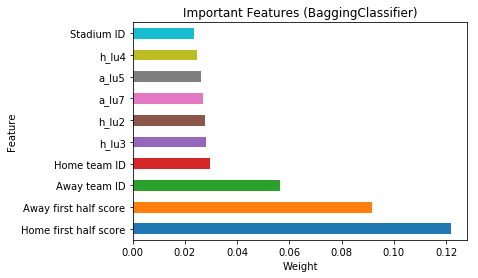

In [144]:
# Graph the important features
# referance: https://stackoverflow.com/a/49157712
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
%matplotlib inline


(pd.Series(results['BaggingClassifier']['feature_imp'], index=x.columns)
            .nlargest(10)
            .plot(kind='barh'))
plt.title(f'Important Features ({clf_E.__class__.__name__})')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.show()

### Evaluation  
From the results I got of the model we can tell that it picked the right features that effect our restuls which is the scores of each team and their score in the first and second hlaf, this can also be seen in the correlation matrix.

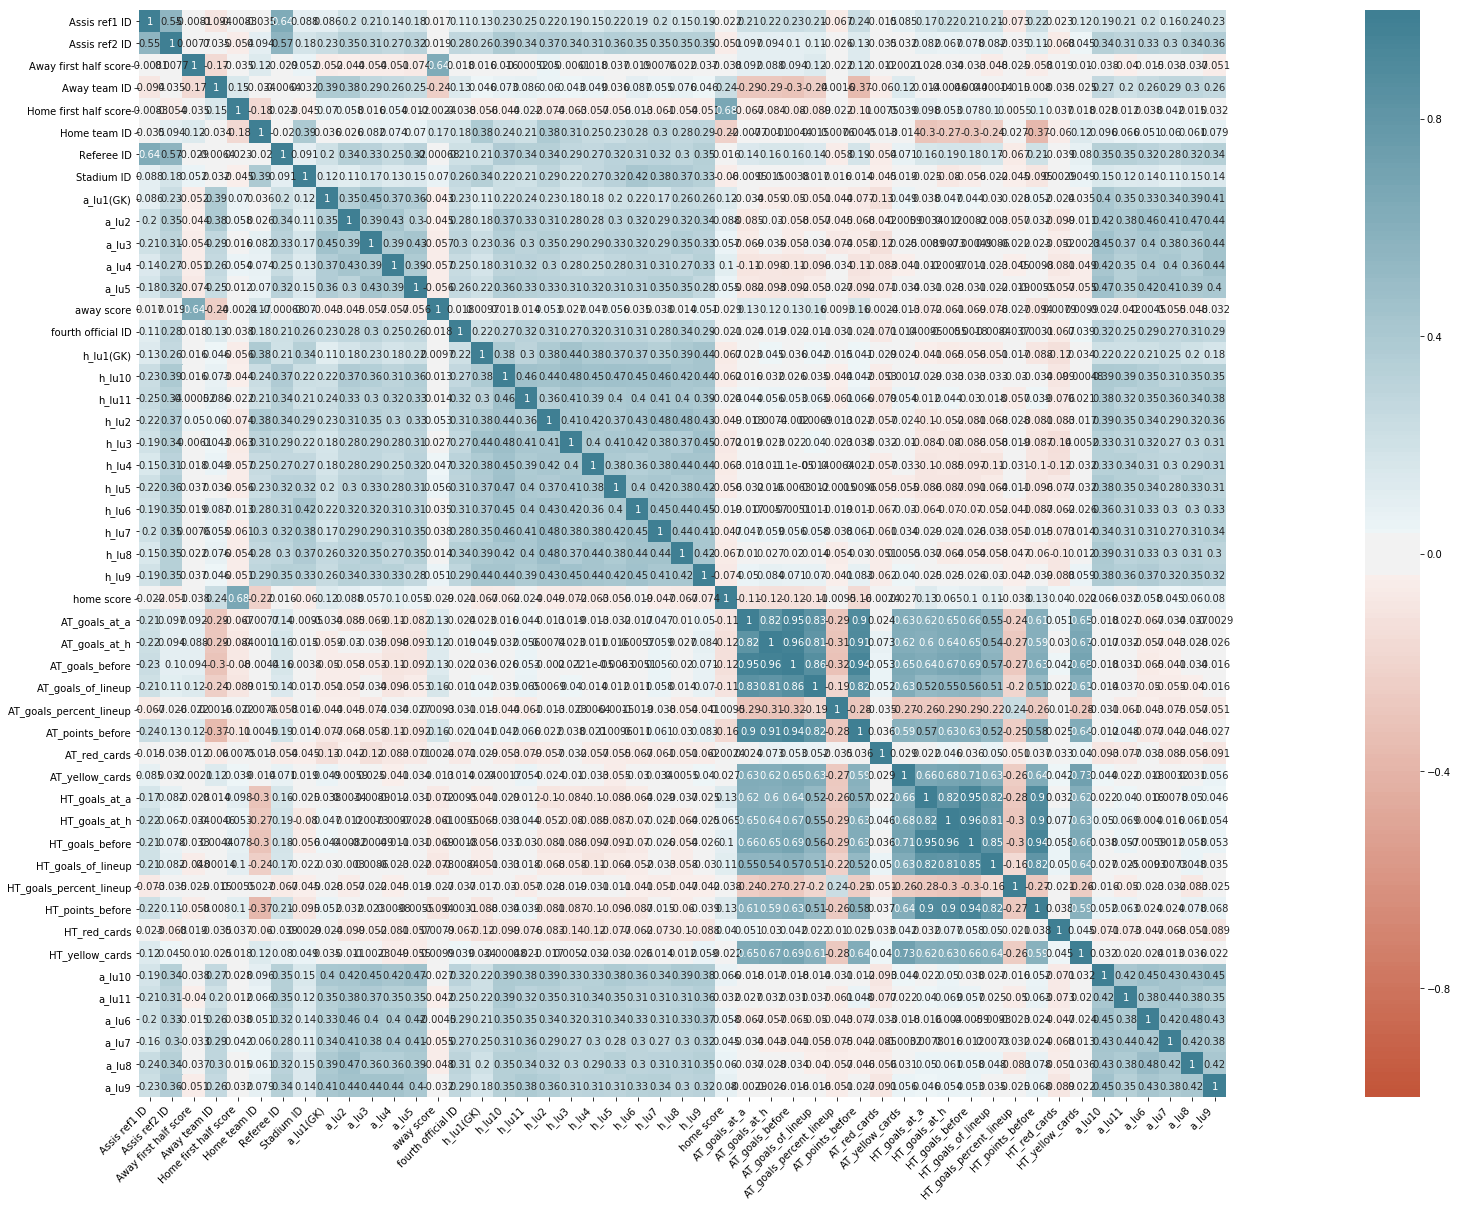

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(50,20))
corr = all_seasons_matches.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

From the correlation matrix, we can see how previous matches for home and away teams can affect the results of their current games.

### Questions and answers
I came up with three questions from the data, some of the questions are related to the features that affected the results of my model.

#### 1- Do home team win more at home or away?
The next graph will show that home teams tend to win more at home than away. Home teams won total of 648 games, while away teams won 501 games.

In [190]:
matches_results = [all_seasons_matches[(
                    all_seasons_matches['Match_result'] ==
                    'Home') &
                   (all_seasons_matches['home score'] >
                    all_seasons_matches['away score'])].shape[0],
                   all_seasons_matches[(
                    all_seasons_matches['Match_result'] ==
                    'Away') &
                   (all_seasons_matches['away score'] >
                    all_seasons_matches['home score'])].shape[0],
                   all_seasons_matches[(
                    all_seasons_matches['Match_result'] == 'Draw')].shape[0]]


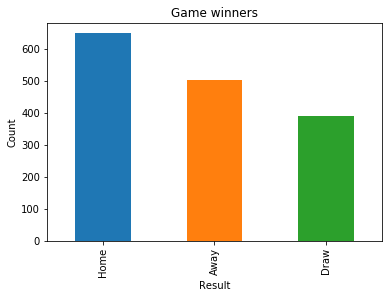

In [195]:
labels = ('Home', 'Away', 'Draw')
(pd.Series(matches_results, index=labels)
    .plot(kind='bar'))
plt.title(f'Game winners')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()


#### 2- Who are the most valuable players, the players with the most wins?
Those are the players who played the game, and won the game. These players are the most valuable because they are part of the team wins.

In [358]:
winners = []
players_wins = {}
for row in all_seasons_matches.iterrows():
    if row[1]['Match_result'] == 'Home':
        for i in get_lineup(row[1]['ID'], 'H'):
            if i not in winners:
                winners.append(i)
    elif row[1]['Match_result'] == 'Away':
        for i in get_lineup(row[1]['ID'], 'A'):
            if i not in winners:
                winners.append(i)
    else:
        continue


In [504]:
players_wins = {}
for idx, row in all_seasons_matches.iterrows():
    if row['Match_result'] == 'Home':
        home_team = row[['h_lu1(GK)', 'h_lu10',
                         'h_lu11', 'h_lu2', 'h_lu3', 'h_lu4', 'h_lu5',
                         'h_lu6',  'h_lu7', 'h_lu8', 'h_lu9']].values.tolist()
        for i in home_team:
            if i in players_wins:
                players_wins[i] += 1
            else:
                players_wins[i] = 1
    if row['Match_result'] == 'Away':
        away_team = row[['a_lu1(GK)', 'a_lu10',
                         'a_lu11', 'a_lu2', 'a_lu3', 'a_lu4', 'a_lu5',
                         'a_lu6',  'a_lu7', 'a_lu8', 'a_lu9']].values.tolist()
        for i in away_team:
            if i in players_wins:
                players_wins[i] += 1
            else:
                players_wins[i] = 1
    else:
        continue

players_wins = pd.DataFrame.from_dict(players_wins,
                                      orient='index').reset_index().rename(
                                      columns={'index': 'Player_id',
                                               0: 'Wins'})

# get players names
players = []
for f in seasons:
    season_players = pd.read_excel(f'data/{f}.xlsx', 4, index_col=0)
    players.append(season_players)
players = pd.concat(players).reset_index()
players = players.drop_duplicates(subset='ID', keep='first')


# set players names
players_wins['player_name'] = ''
for idx, row in players_wins.iterrows():
    try:
        players_wins.at[idx, 'player_name'] = (players[players['ID'] ==
                                                       row['Player_id']]['Name'].values[0])
    except:
        continue

# sort by number of wins
players_wins = players_wins.sort_values('Wins', ascending=False).reset_index(drop=True)


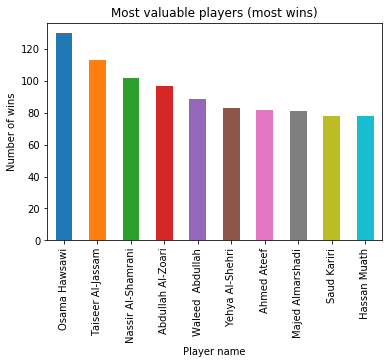

In [505]:
labels = players_wins['player_name']
(pd.Series(players_wins['Wins'].values, index=labels)
            .nlargest(10)
            .plot(kind='bar'))
plt.title(f'Most valuable players (most wins)')
plt.xlabel('Player name')
plt.ylabel('Number of wins')
plt.show()


#### 3- Does clean sheets help you win the title?
I want to show the teams that got most goals and those who got the lowest goals, and from all matches, how many of each team got out of a game with clean sheets (0 goals against). In the last graph we can see that having clean sheet or low goals against didn't cause the team to win the title.

In [707]:
# get clubs names
clubs = []
for f in seasons:
    season_clubs = pd.read_excel(f'data/{f}.xlsx', 3, index_col=0)
    clubs.append(season_clubs)
clubs = pd.concat(clubs, sort=False).reset_index()
clubs = clubs[['index', 'Name']]
clubs.columns = ['Club id', 'Name']
clubs = clubs.drop_duplicates(subset='Club id', keep='first')


# get title winners
tables = []
for f in seasons:
    season_table = pd.read_excel(f'data/{f}.xlsx', 0, index_col=0)
    tables.append(season_table)
tables = pd.concat(tables, sort=False).reset_index()
tables = tables[tables['Rank'] == 1]
winners = tables.groupby('Team').count().reset_index()
winners = winners[['Team', 'Played']]

# set team stats
team_stat = {}
for k, row in all_seasons_matches.groupby('Home team ID'):
    team_stat[k] = {'titles': 0,
                    'match_played': 0,
                    'clean_sheet': 0,
                    'goals_for': 0,
                    'goals_against': 0,
                    'team_name': clubs[clubs['Club id'] ==
                                       k]['Name'].values[0]}

for idx, row in all_seasons_matches.iterrows():
    if row['home score'] == 0:
        team_stat[row['Home team ID']]['clean_sheet'] += 1
    if row['away score'] == 0:
        team_stat[row['Away team ID']]['clean_sheet'] += 1

    team_stat[row['Home team ID']]['goals_for'] += row['home score']
    team_stat[row['Away team ID']]['goals_for'] += row['away score']

    team_stat[row['Home team ID']]['goals_against'] += row['away score']
    team_stat[row['Away team ID']]['goals_against'] += row['home score']

    team_stat[row['Home team ID']]['match_played'] += 1
    team_stat[row['Away team ID']]['match_played'] += 1

team_stat = list(team_stat.values())
team_stat = pd.DataFrame(team_stat)
team_stat['clean_cheet_perc'] = round((team_stat['clean_sheet'] /
                                      team_stat['match_played']) *
                                      100, 2)
team_stat = team_stat.sort_values(['match_played',
                                  'clean_cheet_perc'], ascending=False)

# set titles column
for idx, row in team_stat.iterrows():
    try:
        team_stat.at[idx, 'titles'] = winners[winners['Team'] == row['team_name']]['Played'].values[0]
    except:
        continue


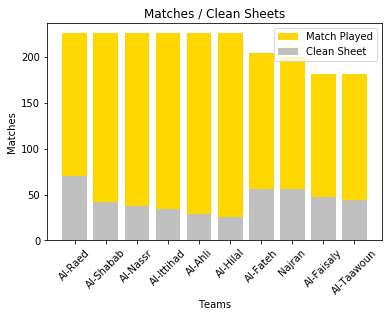

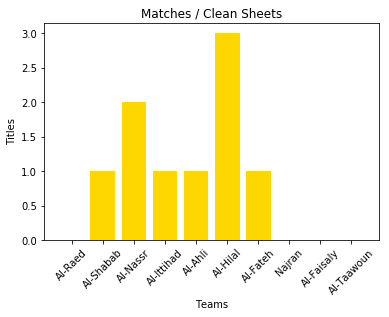

In [717]:
# refernce: http://benalexkeen.com/bar-charts-in-matplotlib/
labels = team_stat['team_name'].head(10)
ind = [x for x, _ in enumerate(labels)]

plt.bar(ind, team_stat['match_played'].head(10),
        label='Match Played', color='gold')
plt.bar(ind, team_stat['clean_sheet'].head(10),
        label='Clean Sheet', color='silver')

plt.xticks(ind, labels)
plt.ylabel("Matches")
plt.xlabel("Teams")
plt.legend(loc="upper right")
plt.title("Matches / Clean Sheets")
plt.setp(plt.gca().get_xticklabels(), rotation=45)
plt.show()


labels = team_stat['team_name'].head(10)
plt.bar(ind, team_stat['titles'].head(10),
        color='gold')

plt.xticks(ind, labels)
plt.ylabel("Titles")
plt.xlabel("Teams")
plt.title("Matches / Clean Sheets")
plt.setp(plt.gca().get_xticklabels(), rotation=45)
plt.show()

References:   
https://www.kaggle.com/angps95/fifa-world-cup-2018-prediction  
https://www.sv-europe.com/crisp-dm-methodology/  
https://www.kaggle.com/mayu0116/hyper-parameters-tuning-of-dtree-rf-svm-knn  